<a href="https://colab.research.google.com/github/csmishra952/UIDAI_Hkthn_Project/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Create the directory for your data
path = "/content/demographic_data/"
if not os.path.exists(path):
    os.makedirs(path)
    print(f"Directory {path} created!")
else:
    print("Directory already exists.")

Directory /content/demographic_data/ created!


In [ ]:
!unzip /content/YOUR_FILE_NAME.zip -d /content/demographic_data/

unzip:  cannot find or open /content/YOUR_FILE_NAME.zip, /content/YOUR_FILE_NAME.zip.zip or /content/YOUR_FILE_NAME.zip.ZIP.


In [ ]:
!unzip "/content/*.zip" -d /content/demographic_data/

Archive:  /content/api_data_aadhar_biometric.zip
   creating: /content/demographic_data/api_data_aadhar_biometric/
  inflating: /content/demographic_data/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv  
  inflating: /content/demographic_data/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv  
  inflating: /content/demographic_data/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv  
  inflating: /content/demographic_data/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv  

Archive:  /content/api_data_aadhar_demographic.zip
   creating: /content/demographic_data/api_data_aadhar_demographic/
  inflating: /content/demographic_data/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv  
  inflating: /content/demographic_data/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv  
  inflating: /content/demographic_data/api_data_aadhar_demographic/api_data_aadhar_demographic

In [ ]:
import os
# This will list everything inside your target folder
print(os.listdir('/content/demographic_data/'))

['api_data_aadhar_biometric', 'api_data_aadhar_demographic', 'api_data_aadhar_enrolment']


In [ ]:
# Move all CSV files from subfolders to the main directory
!mv /content/demographic_data/*/*.csv /content/demographic_data/

# Check again to see if the .csv files are now visible
import os
print("Files now in directory:")
print([f for f in os.listdir('/content/demographic_data/') if f.endswith('.csv')])

Files now in directory:
['api_data_aadhar_enrolment_0_500000.csv', 'api_data_aadhar_biometric_1000000_1500000.csv', 'api_data_aadhar_enrolment_1000000_1006029.csv', 'api_data_aadhar_demographic_1500000_2000000.csv', 'api_data_aadhar_demographic_500000_1000000.csv', 'api_data_aadhar_enrolment_500000_1000000.csv', 'api_data_aadhar_demographic_0_500000.csv', 'api_data_aadhar_biometric_500000_1000000.csv', 'api_data_aadhar_biometric_1500000_1861108.csv', 'api_data_aadhar_demographic_1000000_1500000.csv', 'api_data_aadhar_demographic_2000000_2071700.csv', 'api_data_aadhar_biometric_0_500000.csv']


In [ ]:
import pandas as pd
import glob

# Path where your files are
path = '/content/demographic_data/'

# Get all demographic CSV files
demographic_files = glob.glob(path + "api_data_aadhar_demographic_*.csv")

# Combine them into one DataFrame
df_list = []
for file in demographic_files:
    data = pd.read_csv(file)
    df_list.append(data)

df_demographic = pd.concat(df_list, ignore_index=True)

print(f"Total records loaded: {len(df_demographic)}")
print(df_demographic.head())

Total records loaded: 2071700
         date      state district  pincode  demo_age_5_17  demo_age_17_
0  18-11-2025  Karnataka    Hasan   573118              0             2
1  18-11-2025  Karnataka    Hasan   573124              1             3
2  18-11-2025  Karnataka    Hasan   573150              0             2
3  18-11-2025  Karnataka   Hassan   573113              0             1
4  18-11-2025  Karnataka   Hassan   573120              1             4


In [ ]:
# Aggregate data by State and District
district_stats = df_demographic.groupby(['state', 'district']).agg({
    'demo_age_5_17': 'sum',
    'demo_age_17_': 'sum' # Assuming this is your 18+ column
}).reset_index()

# Create a 'Total' column for analysis
district_stats['total_demographic'] = district_stats['demo_age_5_17'] + district_stats['demo_age_17_']

print(district_stats.head())

                         state       district  demo_age_5_17  demo_age_17_  \
0                       100000         100000              0             2   
1    Andaman & Nicobar Islands       Andamans              7           743   
2    Andaman & Nicobar Islands       Nicobars              0             4   
3    Andaman & Nicobar Islands  South Andaman              6           299   
4  Andaman and Nicobar Islands        Nicobar             58           729   

   total_demographic  
0                  2  
1                750  
2                  4  
3                305  
4                787  


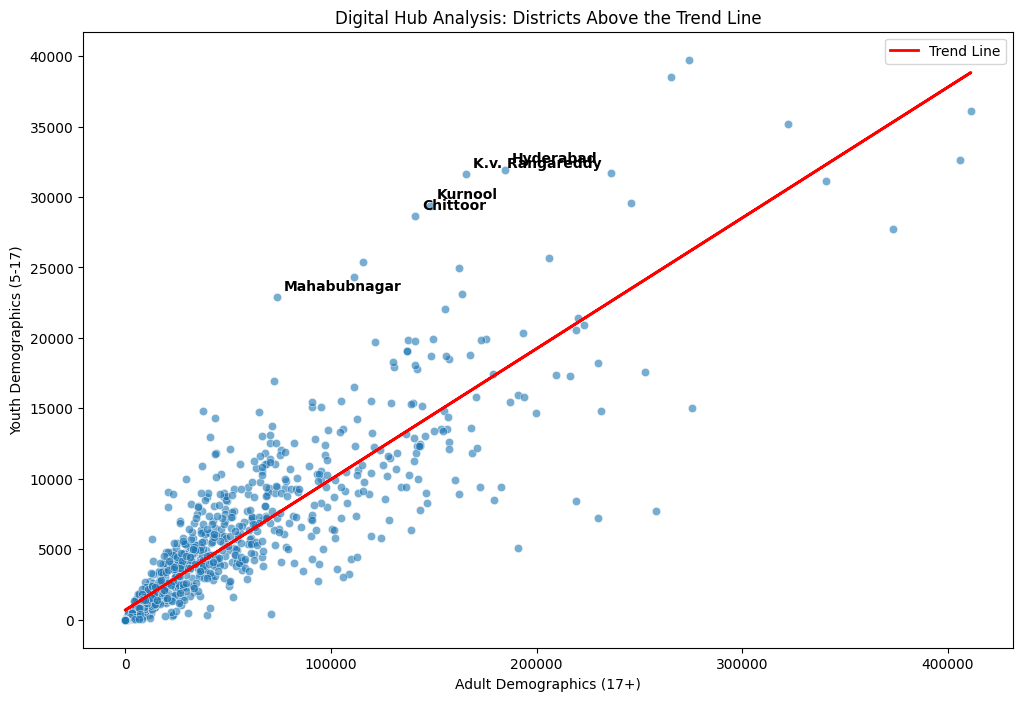

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for the trend line
X = district_stats[['demo_age_17_']].values
y = district_stats['demo_age_5_17'].values

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate how far each point is from the line (Residuals)
district_stats['hub_score'] = y - y_pred

# Identify top 5 "Digital Hubs" (Outliers furthest above the line)
hubs = district_stats.nlargest(5, 'hub_score')

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=district_stats, x='demo_age_17_', y='demo_age_5_17', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Trend Line') # The "Red Line"

# Annotate the Hubs
for i, txt in enumerate(hubs['district']):
    plt.annotate(txt, (hubs['demo_age_17_'].iloc[i], hubs['demo_age_5_17'].iloc[i]),
                 xytext=(5,5), textcoords='offset points', weight='bold')

plt.title('Digital Hub Analysis: Districts Above the Trend Line')
plt.xlabel('Adult Demographics (17+)')
plt.ylabel('Youth Demographics (5-17)')
plt.legend()
plt.show()

In [ ]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.2 MB/s eta 0:00:00


In [ ]:
from thefuzz import process
import pandas as pd

def clean_district_names(df, threshold=90):
    """
    Standardizes district names within each state using fuzzy matching.
    """
    # Create a copy to avoid SettingWithCopy warnings
    df_clean = df.copy()

    for state in df_clean['state'].unique():
        # Get unique districts in this state
        districts = df_clean[df_clean['state'] == state]['district'].unique()

        # We'll map "wrong" names to "right" names
        mapping = {}
        for dist in districts:
            # Find the best match among other districts in the same state
            # excluding the current district itself
            choices = [d for d in districts if d != dist]
            if not choices: continue

            match, score = process.extractOne(dist, choices)

            # If the score is high, it's likely a typo (e.g., Hasan vs Hassan)
            if score >= threshold:
                # To be consistent, we map to the version that appears more often
                count_current = len(df_clean[df_clean['district'] == dist])
                count_match = len(df_clean[df_clean['district'] == match])

                if count_match > count_current:
                    mapping[dist] = match

        # Apply the mapping for this state
        df_clean.loc[df_clean['state'] == state, 'district'] = df_clean['district'].replace(mapping)

    return df_clean

# Apply the cleaning to your aggregated data
district_stats_cleaned = clean_district_names(district_stats)

# Check if 'Hasan' was merged into 'Hassan'
print(district_stats_cleaned[district_stats_cleaned['state'] == 'Karnataka'])

         state          district  demo_age_5_17  demo_age_17_  \
382  Karnataka          Bagalkot          14788         37873   
383  Karnataka        Bagalkot *            164          1032   
384  Karnataka           Ballari           4784         19615   
385  Karnataka         Bangalore           3869         47973   
386  Karnataka   Bangalore Rural           5713         42521   
387  Karnataka          Belagavi          12963         41358   
388  Karnataka           Belgaum          12122         50900   
389  Karnataka           Bellary           3524         23856   
390  Karnataka         Bengaluru          38541        265383   
391  Karnataka   Bengaluru Rural              8            71   
392  Karnataka   Bengaluru South            326          3388   
393  Karnataka             Bidar           6398         36661   
394  Karnataka           Bijapur           5441         24941   
395  Karnataka           Bijapur              0             1   
396  Karnataka    Chamara

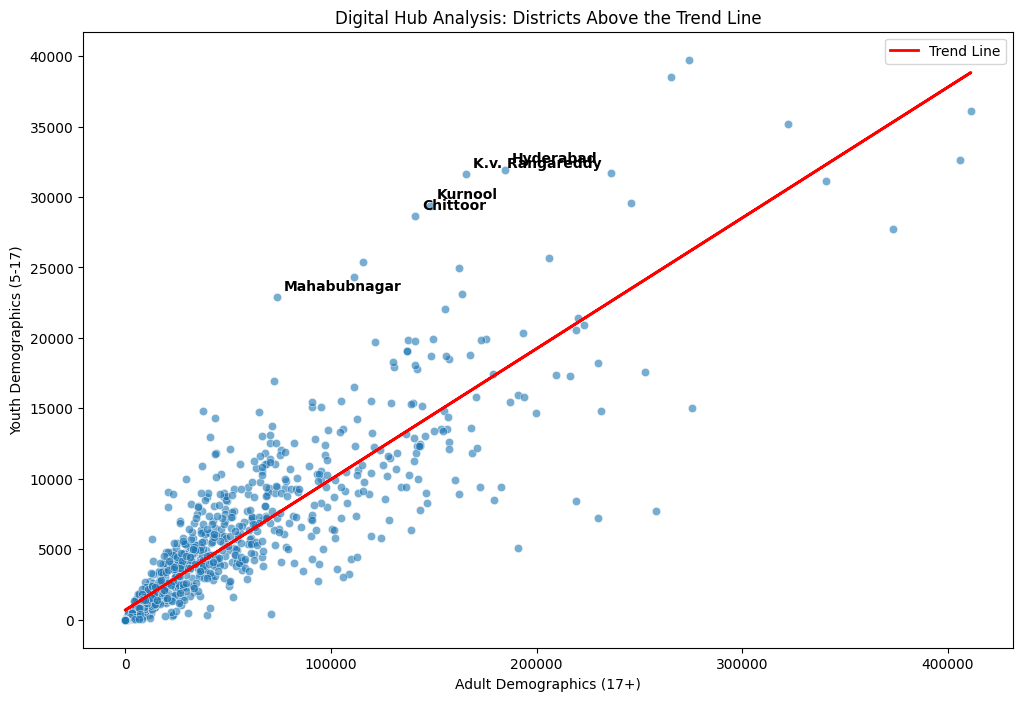

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for the trend line
X = district_stats[['demo_age_17_']].values
y = district_stats['demo_age_5_17'].values

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate how far each point is from the line (Residuals)
district_stats['hub_score'] = y - y_pred

# Identify top 5 "Digital Hubs" (Outliers furthest above the line)
hubs = district_stats.nlargest(5, 'hub_score')

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=district_stats, x='demo_age_17_', y='demo_age_5_17', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Trend Line') # The "Red Line"

# Annotate the Hubs
for i, txt in enumerate(hubs['district']):
    plt.annotate(txt, (hubs['demo_age_17_'].iloc[i], hubs['demo_age_5_17'].iloc[i]),
                 xytext=(5,5), textcoords='offset points', weight='bold')

plt.title('Digital Hub Analysis: Districts Above the Trend Line')
plt.xlabel('Adult Demographics (17+)')
plt.ylabel('Youth Demographics (5-17)')
plt.legend()
plt.show()

In [ ]:
!pip install geopandas matplotlib mapclassify

In [ ]:
import geopandas as gpd

# Download a GeoJSON file for India's districts
# Note: You can replace this URL with any official shapefile source you prefer
url = "https://raw.githubusercontent.com/datameet/maps/master/Districts/census2011.geojson"
india_map = gpd.read_file(url)

# Preview the map data
print(india_map.head())

HTTPError: HTTP Error 404: Not Found

In [ ]:
import geopandas as gpd

# Using an alternative reliable source for India District GeoJSON
url = "https://raw.githubusercontent.com/AnujTiwari/India-State-and-District-Maps/master/india_district.json"

try:
    india_map = gpd.read_file(url)
    print("Map successfully loaded!")
    # Check column names to see how they label districts
    print("Columns in map file:", india_map.columns)
except Exception as e:
    print(f"Error: {e}")

# Preview the map data
india_map.head()

Error: HTTP Error 404: Not Found


NameError: name 'india_map' is not defined

In [ ]:
!pip install geodatasets

import geopandas as gpd
import geodatasets

# Load a built-in low-resolution world map to test the environment
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
print("Environment is ready for mapping!")

Environment is ready for mapping!


In [ ]:
import geopandas as gpd
import requests

# This is a more stable GitHub mirror for India District boundaries
url = "https://raw.githubusercontent.com/sharmasiddharth/India_Districts_Shapefile/master/india_district.json"

try:
    # Attempt to read the file
    india_map = gpd.read_file(url)
    print("Success: India map data loaded!")
    print(f"Columns found: {list(india_map.columns)}")
except Exception as e:
    print(f"Failed to load map: {e}")
    # Create an empty GeoDataFrame so the rest of your code doesn't crash
    india_map = gpd.GeoDataFrame()

# Only run .head() if the data actually exists
if not india_map.empty:
    display(india_map.head())
else:
    print("Warning: india_map is empty. Please check your internet connection or the URL.")

Failed to load map: HTTP Error 404: Not Found


In [ ]:
import geopandas as gpd
import requests

# Stable mirror for India District boundaries
url = "https://raw.githubusercontent.com/geohacker/india/master/district/india_district.geojson"

try:
    print("Connecting to map server...")
    india_map = gpd.read_file(url)
    print("Success: India map data loaded!")
    print(f"Districts found in map: {len(india_map)}")
except Exception as e:
    print(f"Direct download failed: {e}")
    print("\n--- ALTERNATIVE ACTION REQUIRED ---")
    print("1. Go to this URL in your browser: " + url)
    print("2. Save the page as 'india.json'")
    print("3. Upload 'india.json' to your Colab sidebar (folder icon)")
    # Fallback to local file if download fails
    try:
        india_map = gpd.read_file("india.json")
        print("Success: Loaded from local file!")
    except:
        india_map = gpd.GeoDataFrame()
        print("Error: Map still not found. Please upload 'india.json' manually.")

# Check the first few rows to see the column names (usually 'district' or 'NAME_2')
if not india_map.empty:
    display(india_map.head(2))

Connecting to map server...
Success: India map data loaded!
Districts found in map: 594


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."


In [ ]:
import matplotlib.pyplot as plt

# Identify the name column in the map (usually it's 'district' or 'DISTRICT')
# We convert both to uppercase to ensure they match perfectly
india_map['match_key'] = india_map['district'].str.upper()
district_stats['match_key'] = district_stats['district'].str.upper()

# Merge Map + Hub Data
# 'how='left' ensures we keep the map shapes even if data is missing for some areas
merged = india_map.merge(district_stats, on='match_key', how='left')

# Create the Map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged.plot(column='hub_score',
            cmap='OrRd',
            linewidth=0.5,
            ax=ax,
            edgecolor='0.3',
            legend=True,
            legend_kwds={'label': "Digital Hub Intensity (Outlier Score)", 'orientation': "horizontal"},
            missing_kwds={'color': 'lightgrey'}) # Areas with no data show as grey

plt.title('Digital Hub Analysis: Regional Clusters in India', fontsize=18)
ax.set_axis_off()
plt.show()

KeyError: 'district'

In [ ]:
# Check the actual column names in your map
print("Columns in map:", india_map.columns.tolist())

Columns in map: ['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'NL_NAME_2', 'VARNAME_2', 'TYPE_2', 'ENGTYPE_2', 'geometry']


Found district column in map: 'NAME_2'


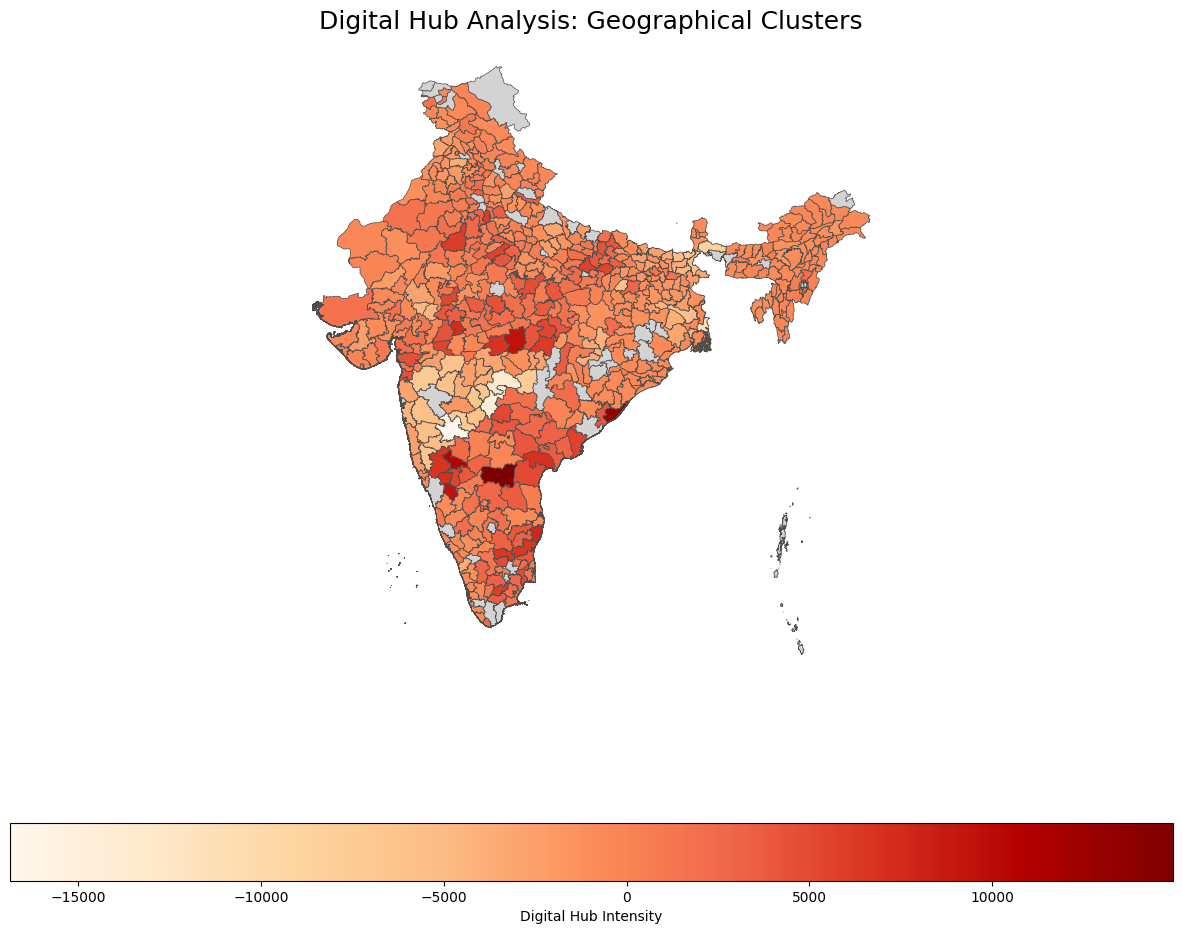

In [ ]:
import matplotlib.pyplot as plt

# 1. Dynamically find the district column in the map
# We look for common names like 'district', 'DISTRICT', or 'NAME_2'
possible_cols = ['district', 'DISTRICT', 'NAME_2', 'NAME_1', 'district_name']
map_dist_col = next((col for col in possible_cols if col in india_map.columns), None)

if map_dist_col:
    print(f"Found district column in map: '{map_dist_col}'")

    # Standardize names in both datasets to UPPERCASE for perfect matching
    india_map['match_key'] = india_map[map_dist_col].astype(str).str.upper()
    district_stats['match_key'] = district_stats['district'].astype(str).str.upper()

    # 2. Merge Map + Hub Data
    merged = india_map.merge(district_stats, on='match_key', how='left')

    # 3. Plot the Map
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    merged.plot(column='hub_score',
                cmap='OrRd',
                linewidth=0.5,
                ax=ax,
                edgecolor='0.3',
                legend=True,
                legend_kwds={'label': "Digital Hub Intensity", 'orientation': "horizontal"},
                missing_kwds={'color': 'lightgrey'})

    plt.title('Digital Hub Analysis: Geographical Clusters', fontsize=18)
    ax.set_axis_off()
    plt.show()
else:
    print("Error: Could not find a district column in the map file. Please check the column names.")

In [ ]:
import glob
import pandas as pd

# 1. Get all biometric CSV files
biometric_files = glob.glob('/content/demographic_data/api_data_aadhar_biometric_*.csv')

# 2. Combine biometric files into one DataFrame
bio_list = []
for file in biometric_files:
    data = pd.read_csv(file)
    bio_list.append(data)

df_biometric = pd.concat(bio_list, ignore_index=True)

# 3. Aggregate biometric data by district
# Using similar column names as found in Aadhaar datasets
bio_district_stats = df_biometric.groupby(['state', 'district']).agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum'
}).reset_index()

# 4. Merge with your existing Hub Scores
# We use 'match_key' (all-caps district name) to ensure a perfect join
district_stats['match_key'] = district_stats['district'].str.upper()
bio_district_stats['match_key'] = bio_district_stats['district'].str.upper()

final_analysis = district_stats.merge(
    bio_district_stats[['match_key', 'bio_age_5_17', 'bio_age_17_']],
    on='match_key',
    how='inner'
)

print(f"Analysis complete for {len(final_analysis)} districts.")
print(final_analysis[['district', 'hub_score', 'bio_age_17_']].head())

Analysis complete for 1443 districts.
        district   hub_score  bio_age_17_
0       Andamans -749.350107         1672
1       Nicobars -687.785481            1
2  South Andaman -709.155663          306
3  South Andaman -709.155663         3491
4        Nicobar -697.051183          819


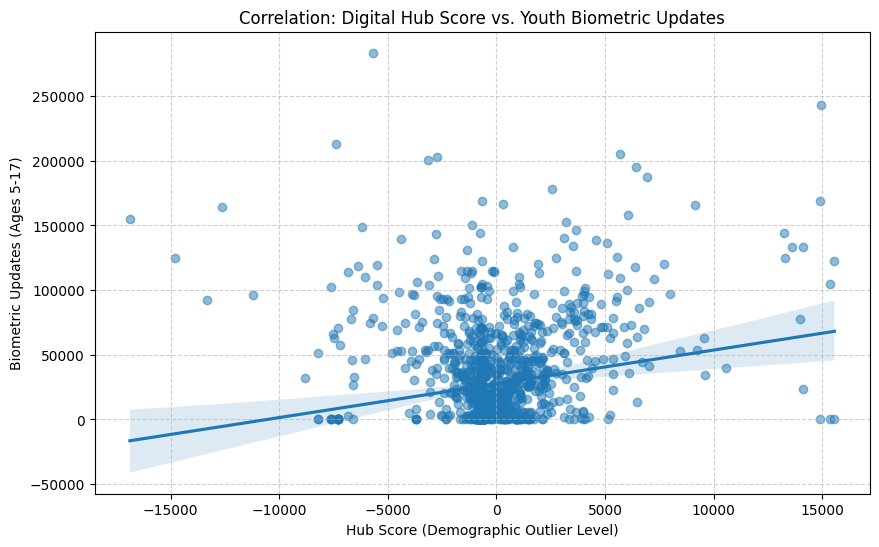

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=final_analysis, x='hub_score', y='bio_age_5_17', scatter_kws={'alpha':0.5})

plt.title('Correlation: Digital Hub Score vs. Youth Biometric Updates')
plt.xlabel('Hub Score (Demographic Outlier Level)')
plt.ylabel('Biometric Updates (Ages 5-17)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Create a binary label: 1 if the district is a high-performing outlier (Digital Hub), 0 otherwise
threshold = final_analysis['hub_score'].quantile(0.85) # Top 15% are labeled as Hubs
final_analysis['is_hub'] = (final_analysis['hub_score'] >= threshold).astype(int)

# Select features for prediction
# We include age ratios and biometric update frequencies as key predictors
features = ['demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
X = final_analysis[features]
y = final_analysis['is_hub']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       236
           1       1.00      0.87      0.93        53

    accuracy                           0.98       289
   macro avg       0.99      0.93      0.96       289
weighted avg       0.98      0.98      0.98       289



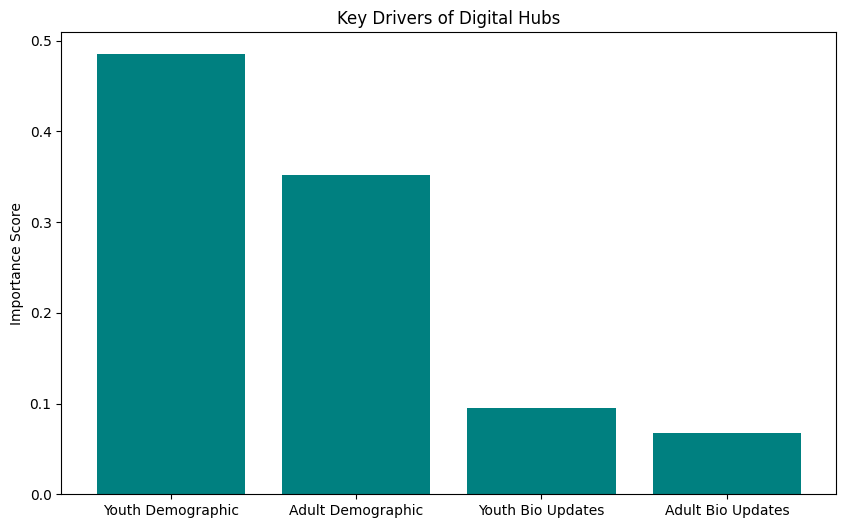

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = ['Youth Demographic', 'Adult Demographic', 'Youth Bio Updates', 'Adult Bio Updates']

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Key Drivers of Digital Hubs")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# Identify indices where the district was actually a hub but predicted as not
hidden_hub_indices = X_test[(y_test == 1) & (y_pred == 0)].index

# Retrieve the actual district names from your original dataframe
hidden_hubs = final_analysis.loc[hidden_hub_indices, ['state', 'district', 'hub_score']]

print(f"Number of Hidden Hubs found: {len(hidden_hubs)}")
print(hidden_hubs)

Number of Hidden Hubs found: 7
              state        district    hub_score
730          Odisha       Dhenkanal  1441.418469
567  Madhya Pradesh          Raisen  2087.209037
529  Madhya Pradesh     Ashok Nagar  1793.113322
985      Tamil Nadu     Kanyakumari  1785.381725
56   Andhra Pradesh  Sri Sathya Sai  1581.252474
259           Delhi     South Delhi  1720.147157
58   Andhra Pradesh        Tirupati  1439.873370


In [ ]:
# Get probabilities for the 'is_hub' class (column index 1)
probabilities = rf_model.predict_proba(X_test)[:, 1]

# Create a DataFrame to view districts with high 'potential' but not yet hubs
test_results = X_test.copy()
test_results['actual_label'] = y_test
test_results['hub_probability'] = probabilities
test_results['district'] = final_analysis.loc[X_test.index, 'district']

# Find districts with high probability (e.g., > 0.4) that aren't yet hubs
emerging_hubs = test_results[(test_results['hub_probability'] > 0.4) & (test_results['actual_label'] == 0)]
print("\n--- Potential Emerging Hubs ---")
print(emerging_hubs[['district', 'hub_probability']])


--- Potential Emerging Hubs ---
        district  hub_probability
192     Bilaspur             0.47
324       Rohtak             0.43
578     Shivpuri             0.49
254  North Delhi             0.43
